# Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pd.set_option('display.max_columns', 500)

# Visão Geral do Dataset de Receitas de Cerveja

## Introdução
Este dataset contém mais de 75.000 receitas de cervejas caseiras com 176 estilos diferentes, todas contribuídas por usuários na plataforma Brewer's Friend. Cada receita é classificada de acordo com um dos 176 estilos de cerveja. O nível de detalhamento das receitas varia conforme o que foi fornecido pelos usuários.

O foco do dataset está em vários atributos essenciais para a fabricação da cerveja, que estão presentes em todas as entradas:
- **OG (Original Gravity - Gravidade Original)**: Densidade do mosto (cerveja não fermentada) antes de iniciar a fermentação.
- **FG (Final Gravity - Gravidade Final)**: Densidade da cerveja depois que a fermentação é concluída.
- **ABV (Alcohol by Volume - Teor Alcoólico)**: Teor de álcool presente na cerveja.
- **IBU (International Bitterness Units - Unidade Internacional de Amargor)**: Mede o nível de amargor proporcionado pelo lúpulo.
- **Color (Cor)**: Estimativa da cor da cerveja, usando o método SRM (Standard Reference Method).

## Tabela de Variáveis

| Variável        | Descrição                                                             |
|----------------|------------------------------------------------------------------------|
| BeerID         | ID da receita                                                         |
| Name           | Nome da cerveja                                                       |
| URL            | Link para a receita no Brewer's Friend                                 |
| Style          | Classificação do estilo da cerveja                                     |
| StyleID        | ID do estilo da cerveja                                                |
| Size(L)        | Tamanho do lote em litros                                              |
| OG             | Gravidade Original - densidade antes da fermentação                    |
| FG             | Gravidade Final - densidade após a fermentação                         |
| ABV            | Teor Alcoólico - porcentagem de álcool na cerveja                      |
| IBU            | Unidades Internacionais de Amargor - nível de amargor do lúpulo        |
| Color          | Estimativa da cor da cerveja (SRM - Método de Referência Padrão)       |
| BoilSize       | Volume do mosto antes da fervura                                       |
| BoilTime       | Duração do processo de fervura                                         |
| BoilGravity    | Gravidade medida durante a fervura                                     |
| Efficiency     | Eficiência do processo de fabricação                                   |
| MashThickness  | Proporção de água para grãos durante a maceração                       |
| SugarScale     | Escala usada para medir o açúcar (por exemplo, Plato ou Brix)          |
| BrewMethod     | Método de fabricação (por exemplo, All Grain, Extrato)                 |
| PitchRate      | Quantidade de levedura adicionada por volume                           |
| PrimaryTemp    | Temperatura durante a fermentação primária                             |
| PrimingMethod  | Tipo de açúcar usado para carbonatação                                 |
| PrimingAmount  | Quantidade de açúcar usada para carbonatação                           |
| UserId         | ID do usuário que enviou a receita                                     |

## Agradecimentos
O site Brewer's Friend permite que usuários compartilhem suas receitas de cervejas caseiras. Este dataset contém uma seleção das receitas enviadas até o momento.

In [21]:
df = pd.read_csv('../datasets/recipeData.csv', encoding='latin1')
df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73859 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

In [32]:
df.describe()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
count,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,70871.000000,73861.000000,43997.000000,34609.000000,51199.000000
mean,60.179432,43.929775,1.406266,1.075865,6.136865,44.276186,13.404989,49.724919,65.074870,1.353955,66.354881,2.127235,0.750468,19.175641
std,56.811462,180.373492,2.196908,0.432524,1.883510,42.945508,11.944511,193.246427,15.024228,1.930989,14.091686,1.682347,0.394262,4.219676
min,1.000000,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000
25%,10.000000,18.930000,1.051000,1.011000,5.080000,23.370000,5.170000,20.820000,60.000000,1.040000,65.000000,1.500000,0.350000,18.000000
50%,35.000000,20.820000,1.058000,1.013000,5.790000,35.770000,8.440000,27.440000,60.000000,1.047000,70.000000,1.500000,0.750000,20.000000
75%,111.000000,23.660000,1.069000,1.017000,6.830000,56.380000,16.790000,30.000000,60.000000,1.060000,75.000000,3.000000,1.000000,20.000000
max,176.000000,9200.000000,34.034500,23.424600,54.720000,3409.300000,186.000000,9700.000000,240.000000,52.600000,100.000000,100.000000,2.000000,114.000000


<Figure size 1500x1000 with 0 Axes>

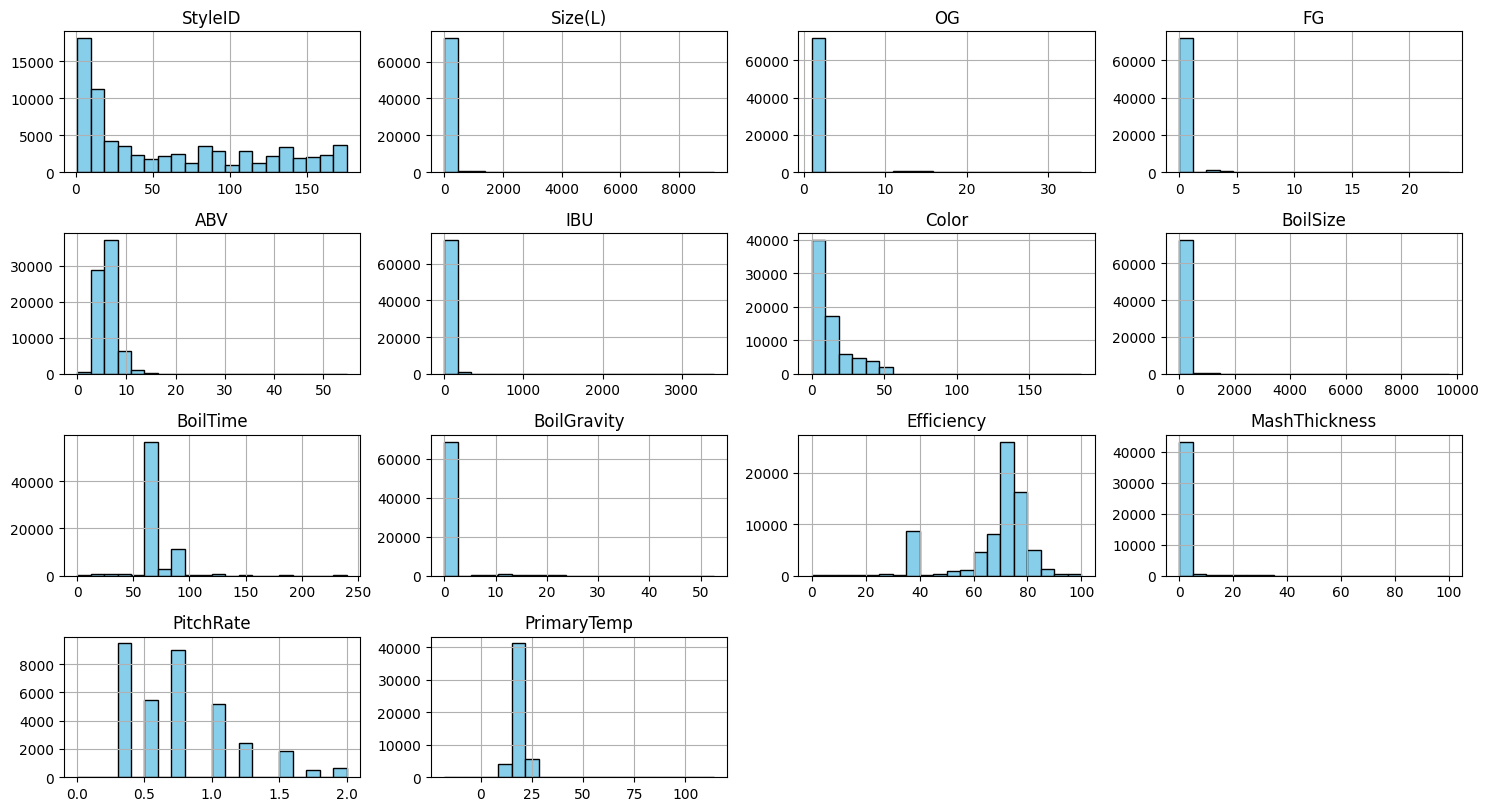

In [34]:
plt.figure(figsize=(15, 10))
df.hist(bins=20, figsize=(15, 10), layout=(5, 4), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

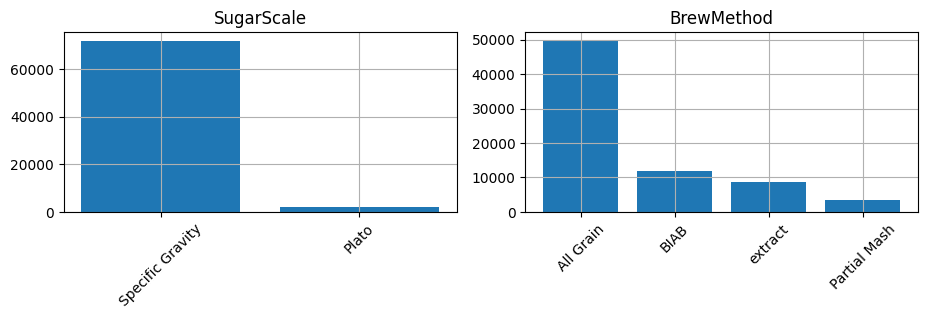

In [36]:
import matplotlib.pyplot as plt

categorical_data = df.drop('Style', axis=1).select_dtypes(include=['object'])

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14, 14)) 

for i, feature in enumerate(categorical_data.columns):
    row, col = divmod(i, 3) 
    counts = categorical_data[feature].value_counts()

    axes[row, col].bar(counts.index, counts.values)
    axes[row, col].set_title(feature) 
    axes[row, col].tick_params(axis='x', rotation=45) 
    axes[row, col].grid(True)
    plt.grid(True)

for j in range(i + 1, 5 * 3):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()


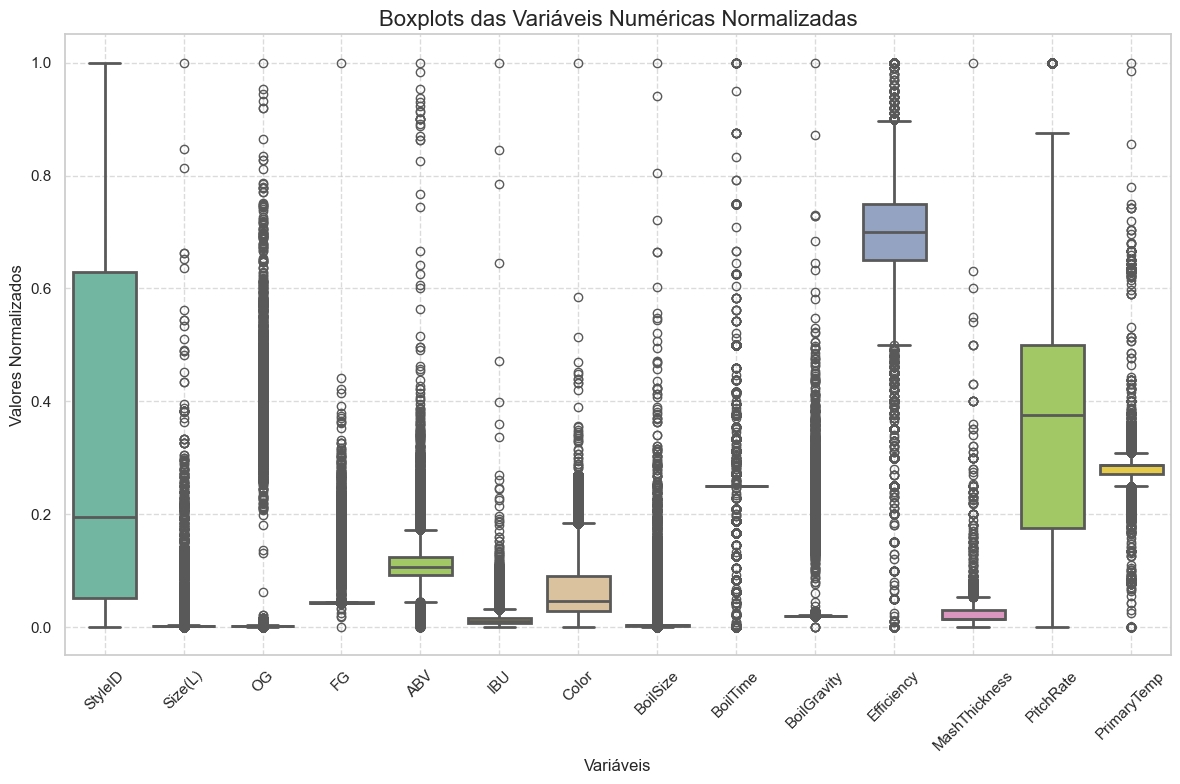

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Seleciona as colunas numéricas do DataFrame
numeric_data = df.select_dtypes(include=['number'])

# Normaliza os dados usando Min-Max Scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)

# Cria um novo DataFrame com os dados normalizados
normalized_df = pd.DataFrame(normalized_data, columns=numeric_data.columns)

# Configura o estilo do Seaborn
sns.set(style="whitegrid")

# Cria o boxplot estilizado
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=normalized_df, palette="Set2", linewidth=2)

# Personaliza o gráfico
ax.set_title("Boxplots das Variáveis Numéricas Normalizadas", fontsize=16)
ax.set_xlabel("Variáveis", fontsize=12)
ax.set_ylabel("Valores Normalizados", fontsize=12)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X
plt.grid(True, linestyle='--', alpha=0.7)  # Grid mais leve e pontilhado

# Exibe o gráfico
plt.tight_layout()
plt.show()


# Análise e Tratamento de dados

Verificando duplicadas

In [7]:
len(df[df.duplicated()])

0

Verifiancando dados nulos

In [11]:
round(df.isna().sum()/len(df) * 100)

BeerID            0.0
Name              0.0
URL               0.0
Style             1.0
StyleID           0.0
Size(L)           0.0
OG                0.0
FG                0.0
ABV               0.0
IBU               0.0
Color             0.0
BoilSize          0.0
BoilTime          0.0
BoilGravity       4.0
Efficiency        0.0
MashThickness    40.0
SugarScale        0.0
BrewMethod        0.0
PitchRate        53.0
PrimaryTemp      31.0
PrimingMethod    91.0
PrimingAmount    94.0
UserId           68.0
dtype: float64

Dropando as variáveis que com certeza não iremos usar

In [27]:
df.drop(columns=['PrimingMethod', 'PrimingAmount', 'UserId', 'URL', 'BeerID', 'Name'], inplace=True)

Verificando consistência das variáveis nominais 

In [28]:
unique_values = []
for feature in df.drop(columns='Style').select_dtypes(include=['object']).columns:
    unique_values.append({feature: df[feature].unique().tolist()})

unique_values


[{'SugarScale': ['Specific Gravity', 'Plato']},
 {'BrewMethod': ['All Grain', 'extract', 'BIAB', 'Partial Mash']}]

Verificando consistência dos valores da coluna de styleID

In [30]:
print(len(df['Style'].unique()))
print(len(df['StyleID'].unique()))

176
176


Remoção de outliers para melhor treinamento do modelo de machine learning

In [49]:
# Seleciona as colunas numéricas do DataFrame
numeric_data = df.select_dtypes(include=['number'])

# Calcula os limites com base no IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
VISTA_GROSSA = 2.0

# Filtra os dados para remover outliers
filtered_data = numeric_data[~((numeric_data < (Q1 - VISTA_GROSSA * IQR)) | 
                               (numeric_data > (Q3 + VISTA_GROSSA * IQR))).any(axis=1)]

len(filtered_data)

30127

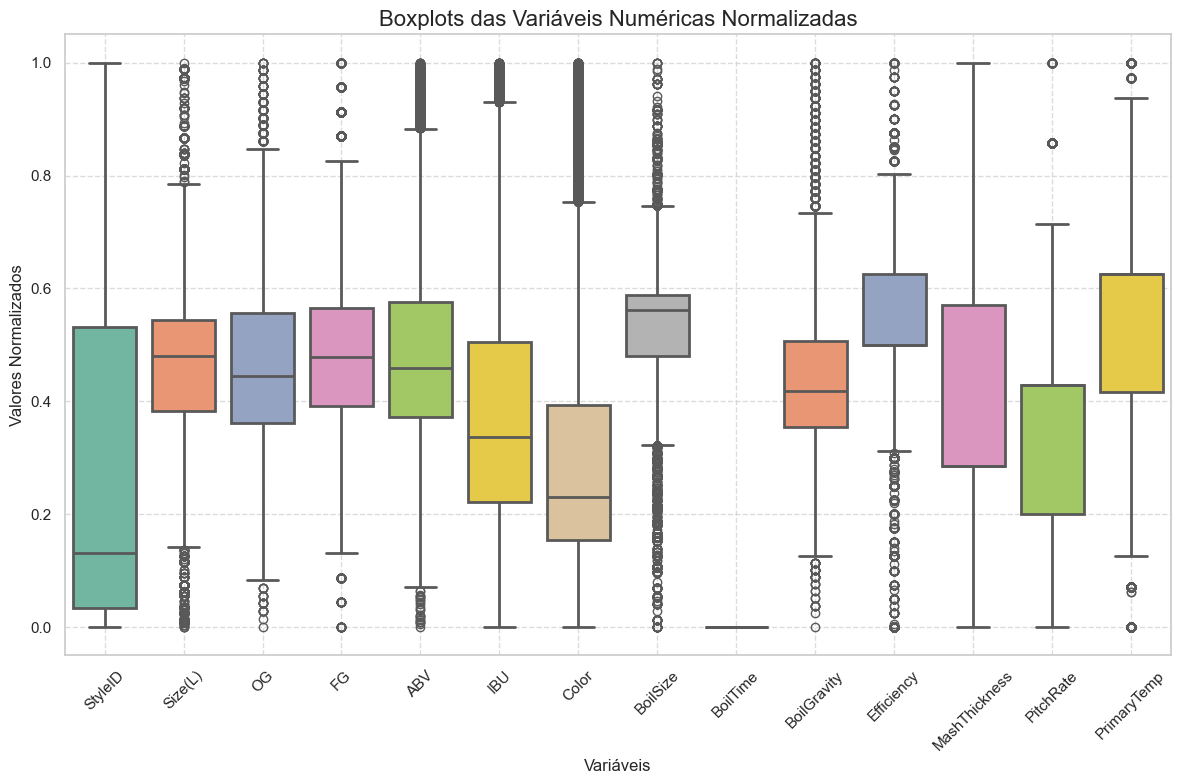

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Seleciona as colunas numéricas do DataFrame
numeric_data = df.select_dtypes(include=['number'])

# Calcula os limites com base no IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filtra os dados para remover outliers
filtered_data = numeric_data[~((numeric_data < (Q1 - 1.5 * IQR)) | 
                               (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normaliza os dados filtrados usando Min-Max Scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(filtered_data)

# Cria um novo DataFrame com os dados normalizados
normalized_df = pd.DataFrame(normalized_data, columns=filtered_data.columns)

# Configura o estilo do Seaborn
sns.set(style="whitegrid")

# Cria o boxplot estilizado
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=normalized_df, palette="Set2", linewidth=2)

# Personaliza o gráfico
ax.set_title("Boxplots das Variáveis Numéricas Normalizadas", fontsize=16)
ax.set_xlabel("Variáveis", fontsize=12)
ax.set_ylabel("Valores Normalizados", fontsize=12)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X
plt.grid(True, linestyle='--', alpha=0.7)  # Grid mais leve e pontilhado

# Exibe o gráfico
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

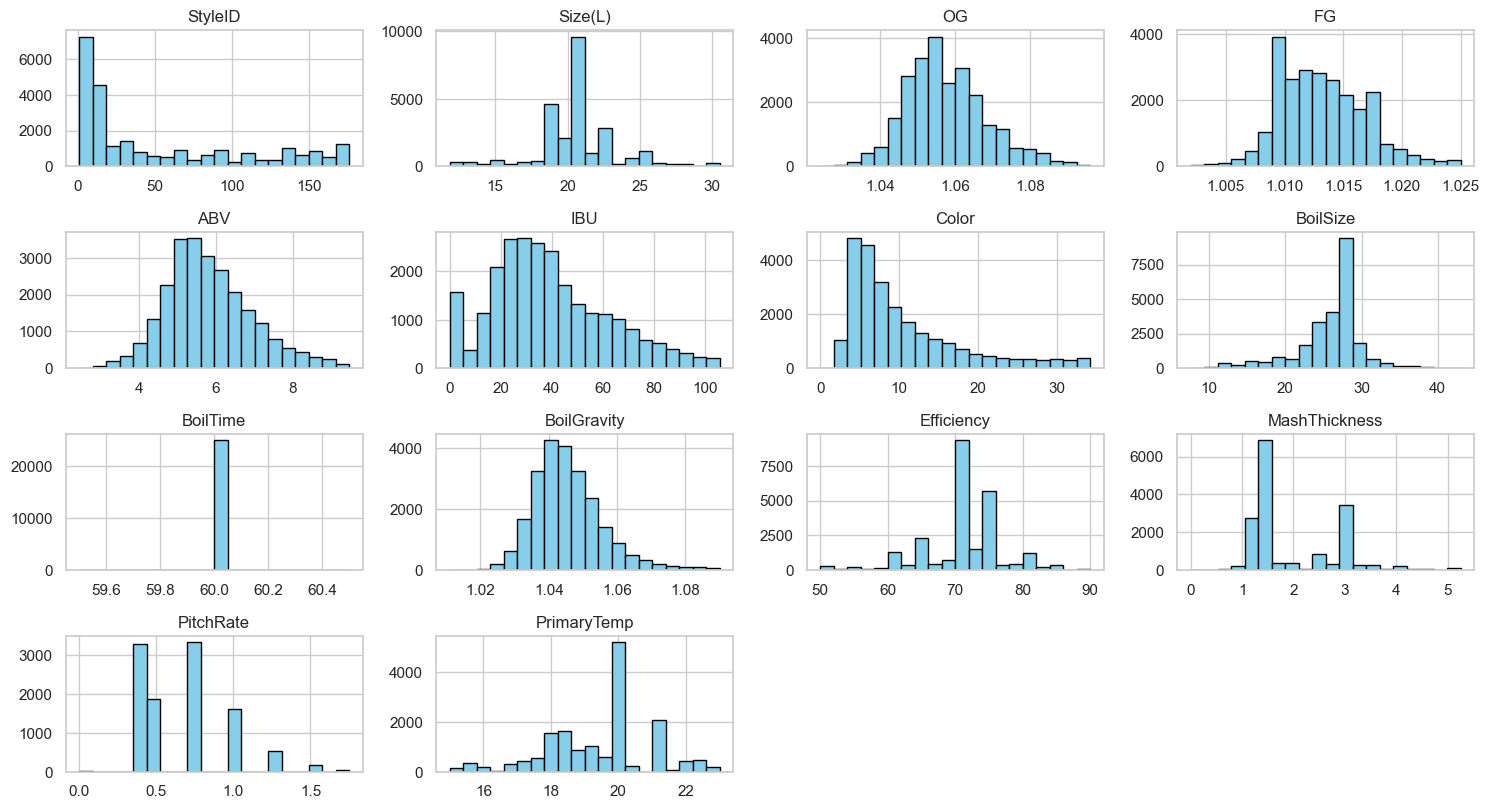

In [54]:
plt.figure(figsize=(15, 10))
filtered_data.hist(bins=20, figsize=(15, 10), layout=(5, 4), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Pré-treinamento

In [58]:
style_counts = filtered_data['StyleID'].value_counts()
popular_style_ids = style_counts[style_counts > 1000].index

dados = filtered_data[filtered_data['StyleID'].isin(popular_style_ids)]

print(dados.shape)
print(filtered_data.head())


(8513, 14)
    StyleID  Size(L)     OG     FG   ABV    IBU  Color  BoilSize  BoilTime  \
1        85    20.82  1.083  1.021  8.16  60.65  15.64     24.61        60   
2         7    18.93  1.063  1.018  5.91  59.25   8.98     22.71        60   
3         7    22.71  1.061  1.017  5.80  54.48   8.50     26.50        60   
9        86    20.82  1.080  1.017  8.22  93.02   8.29     28.39        60   
12        7    20.82  1.073  1.019  7.07  69.72   6.28     28.39        60   

    BoilGravity  Efficiency  MashThickness  PitchRate  PrimaryTemp  
1         1.070        70.0            NaN        NaN          NaN  
2           NaN        70.0            NaN        NaN          NaN  
3           NaN        70.0            NaN        NaN          NaN  
9         1.058        70.0            NaN        NaN        21.11  
12          NaN        70.0            NaN        NaN          NaN  


: 